# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

# 1 - Business Problem

**Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"**

# 2 - Data collection and description

# Import dataset

In [2]:
df = pd.read_csv("Fraud_check.csv")

In [3]:
df1 = df.copy()

# 3- EDA

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [8]:
df1.shape

(600, 6)

In [9]:
df1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
df1.size

3600

# 4 - Check Outliers

C:\Users\Dell\anaconda3\envs\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


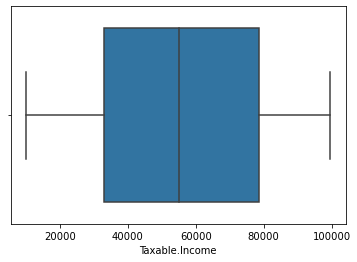

In [11]:
ax = sns.boxplot(df1['Taxable.Income'])

 **There are no outliers in the data**

In [12]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


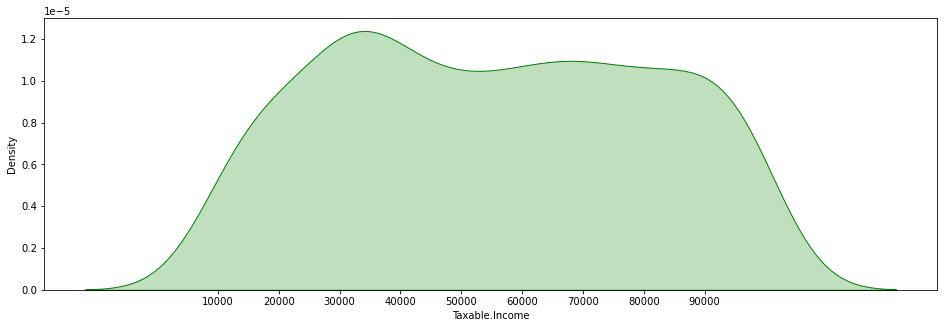

In [13]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

**The data is Skwed on the right**

**The data has negative Kurtosis**

In [14]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

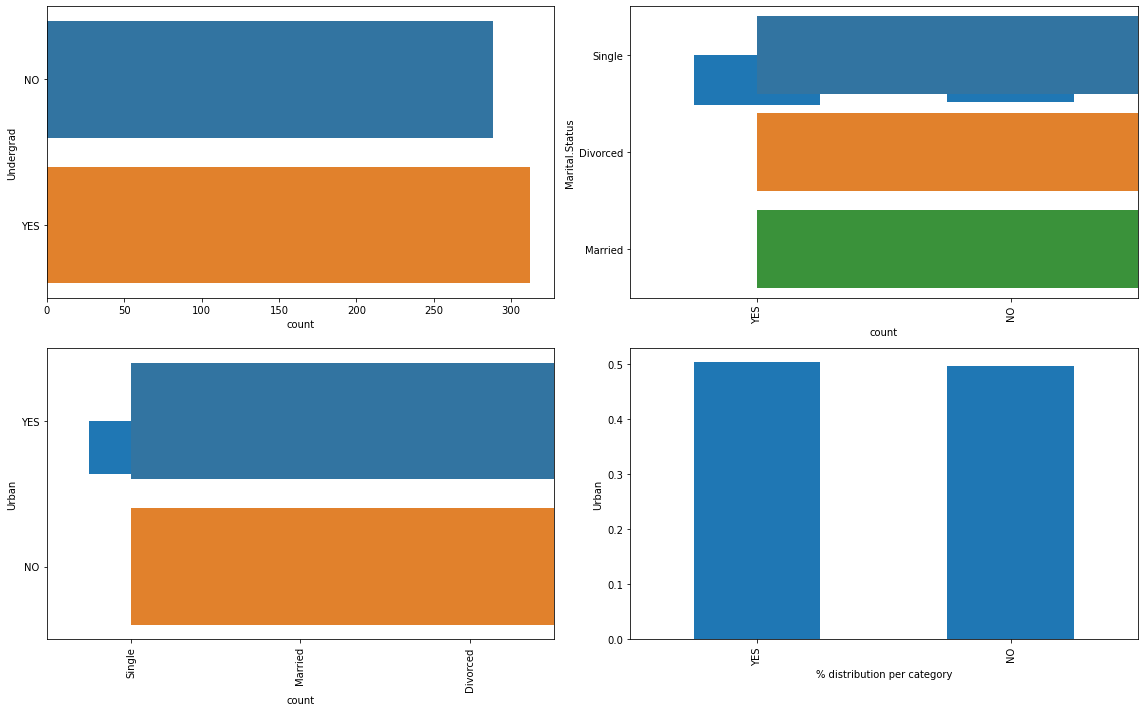

In [15]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [16]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

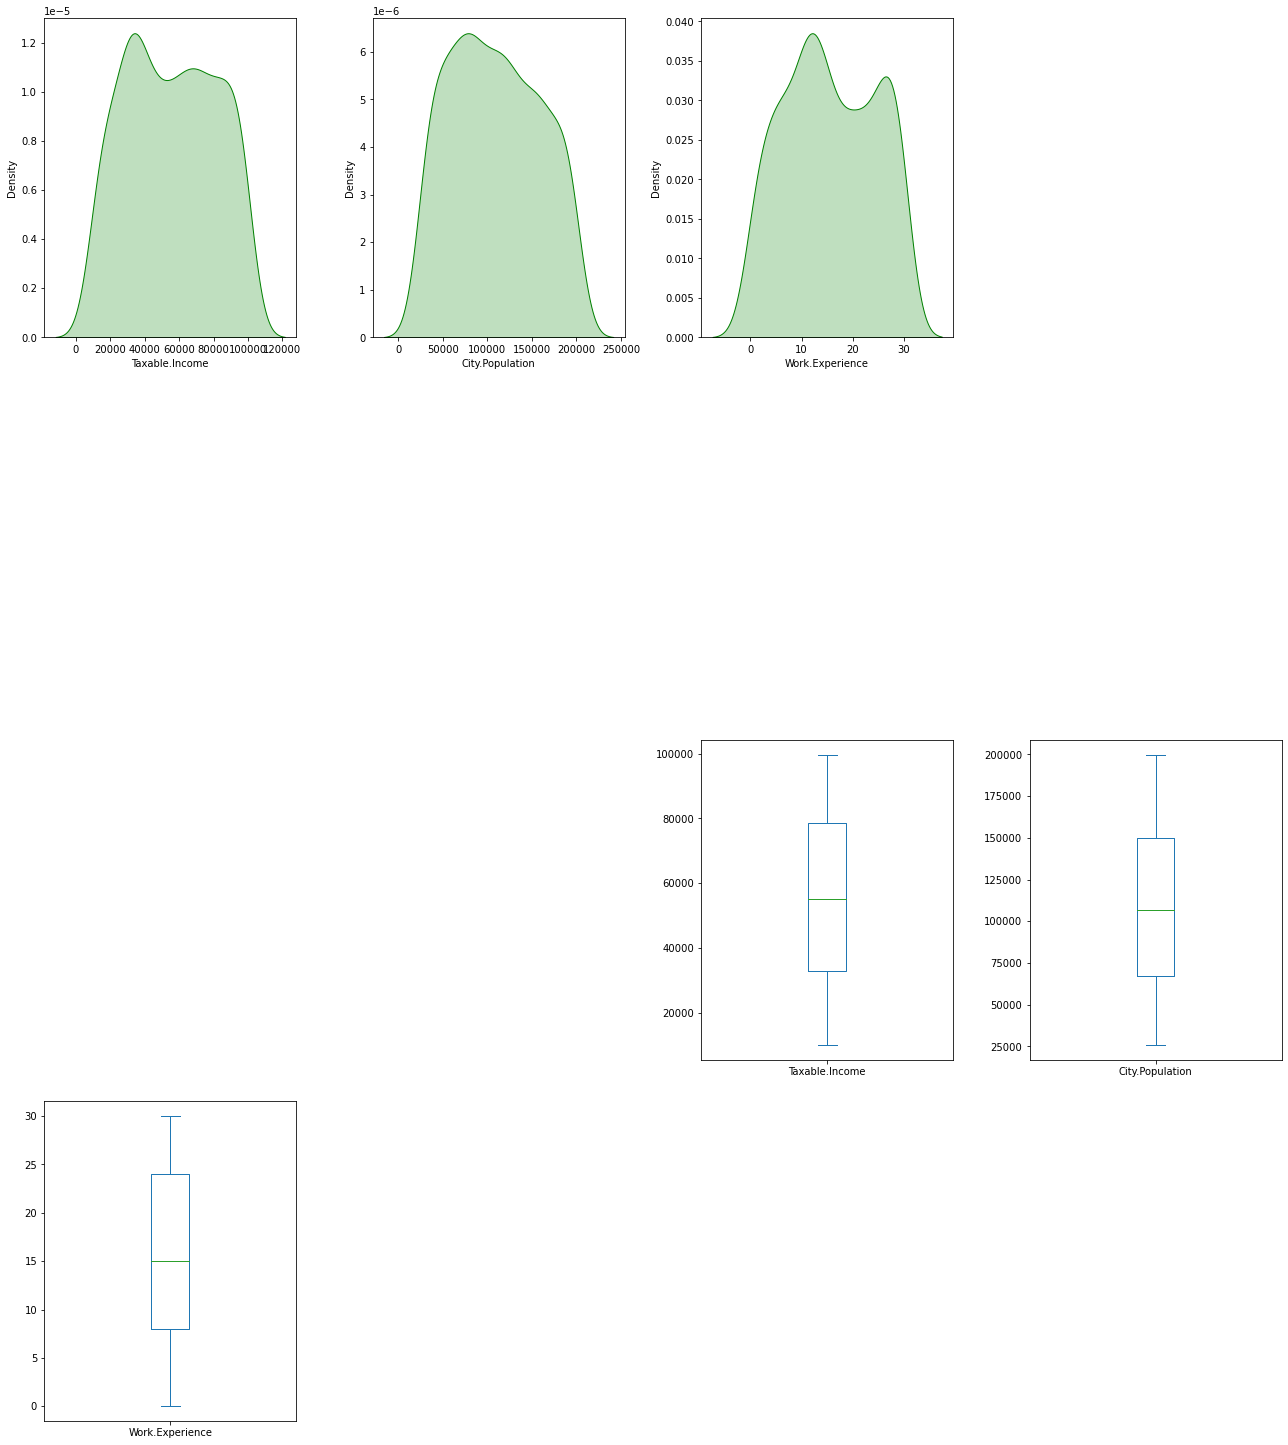

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [17]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [18]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

In [19]:
corr = df1.corr()

In [20]:
corr = df1.corr()

<AxesSubplot:>

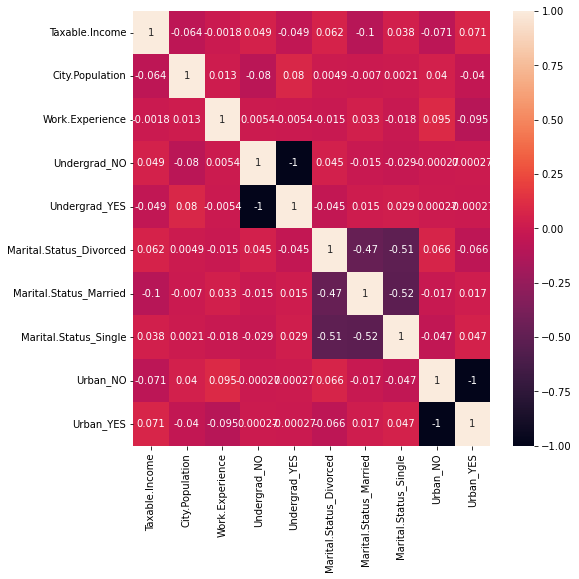

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

# 5 - Random Forest Model

**Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"**

In [22]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [23]:
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [24]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [26]:
y_train.value_counts()

good     381
risky     99
Name: Taxable.Income, dtype: int64

In [27]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.7395833333333334

In [28]:
pred_train = model.predict(x_train)

In [29]:
accuracy_score(y_train,pred_train)

1.0

In [30]:
confusion_matrix(y_train,pred_train)

array([[381,   0],
       [  0,  99]], dtype=int64)

In [31]:
pred_test = model.predict(x_test)

In [32]:
accuracy_score(y_test,pred_test)

0.8

In [33]:
confusion_matrix(y_test,pred_test)

array([[94,  1],
       [23,  2]], dtype=int64)

In [34]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [35]:
df_t

,Actual,Predicted
565,good,good
82,good,good
557,risky,good
113,good,good
480,good,good
...,...,...
140,risky,good
122,risky,good
306,good,good
358,good,good


In [36]:
cols = list(df1.columns)

In [37]:
predictors = cols[1:10]
target = cols[0]

In [38]:
tree1 = model.estimators_[20]

In [39]:
dot_data = StringIO()

In [40]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)


In [41]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [42]:
graph.write_png('fraud_full.png')

True

# 6- Conclusion

**Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 72%**

**As seen in the confusion matrix of Test data 94 instances are presdected correctly and 26 instances are not**

In [43]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [44]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [45]:
tree_small = rf_small.estimators_[5]

In [46]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [49]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [50]:
graph.write_png('fraud_small.png')

True

In [51]:
img = mpimg.imread('fraud_small.png') 

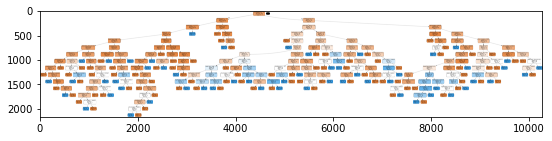

In [52]:
plt.imshow(img)

In [53]:
model.feature_importances_

array([0.53889751, 0.34642424, 0.01487347, 0.01645281, 0.01649336,
       0.01596105, 0.01913241, 0.0156641 , 0.01610105])

In [54]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [55]:
fi

,feature,importance
0,City.Population,0.538898
1,Work.Experience,0.346424
6,Marital.Status_Single,0.019132
4,Marital.Status_Divorced,0.016493
3,Undergrad_YES,0.016453
8,Urban_YES,0.016101
5,Marital.Status_Married,0.015961
7,Urban_NO,0.015664
2,Undergrad_NO,0.014873


**As seen in the above table city population is most important feature**